# **Sentiment Analysis**

<hr>

## **Problem Statement**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

**Dataset**:

The dataset has the following columns:

- tweet_id                                         
- airline_sentiment                                   
- airline_sentiment_confidence                       
- negativereason     
- negativereason_confidence  
- airline   
- airline_sentiment_gold        
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

<hr>

### **Import Libraries**


In [ ]:
#Import Pandas and NumPy
import pandas as pd
import numpy as np
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Import RegEx, String, and Unicode Data
import re, string, unicodedata
#Natural language processing tool-kit
import nltk                                   
#Install and import contractions
!pip install contractions
import contractions
#Parsing library
from bs4 import BeautifulSoup
#Install tokinizers
from nltk import word_tokenize, sent_tokenize
#Stopwords, and wordnet corpus
from nltk.corpus import stopwords, wordnet    
from nltk.stem import LancasterStemmer, WordNetLemmatizer
#Import WordCloud
import wordcloud
#Import spacy
import spacy
#Import CountVectorizer and TFID Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Import for model building and cross validation scoring
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
#Import TextBlob
from textblob import TextBlob
#Import VADER Sentiment Analyzer
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 5.2 MB/s 
     |████████████████████████████████| 287 kB 56.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.1 MB/s 


### **Import Dataset**

In [ ]:
#mount and connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import dataset "Tweets.csv"
data_original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets.csv')

Mounted at /content/drive


In [ ]:
#Make copy of original dataset
data = data_original.copy()

# **Data Analysis**

Add your view and opinion along with the problem statement, Import the libraries, load dataset, print the shape of data, data description.

In [ ]:
#Shape of data
data.shape
#Number of rows and columns
print(f'Number of rows: {data.shape[0]} and Number of columns: {data.shape[1]}')

Number of rows: 14640 and Number of columns: 15


In [ ]:
#Review the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**Observations**

*   There are (2) float64 types
*   There are (2) int64 types
*   There are (11) object types



In [ ]:
#Review unique values
pd.DataFrame(data.nunique())

,0
tweet_id,14485
airline_sentiment,3
airline_sentiment_confidence,1023
negativereason,10
negativereason_confidence,1410
airline,6
airline_sentiment_gold,3
name,7701
negativereason_gold,13
retweet_count,18


**Observations**

The following are the number of unique values per feature:

*   **tweet_id:** 14,485
*   **airline_sentiment:** 3
*   **airline_sentiment_confidence:** 1,023
*   **negativereason:** 10
*   **negativereason_confidence:** 1,410
*   **airline:** 6
*   **airline_sentiment_gold:** 3
*   **name:** 7,701
*   **negativereason_gold:** 13
*   **retweet_count:** 18
*   **text:** 14,427
*   **tweet_coord:** 832
*   **tweet_created:** 14,247
*   **tweet_location:** 3,081
*   **user_timezone:** 85


In [ ]:
#Review of duplicate values in the data
data.duplicated().sum()

36

**Observations**

Since this is such a small number in relation to the size of the dataset, we can actually drop these.

In [ ]:
#Dropping the duplicated values
data.drop_duplicates(inplace = True)
data.reset_index(inplace = True, drop ='first')

In [ ]:
#Validate that duplicates have been dropped
data.duplicated().sum()

0

**Observations**

The duplicated data has been removed.

In [ ]:
#Review the null values in the dataset
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

**Observations**

The following features have null values:

*   **negativereason:** 5,445
*   **negativereason_confidence:** 4,101
*   **airline_sentiment_gold:** 14,564
*   **negativereason_gold:** 14,572
*   **tweet_coord:** 13,589
*   **tweet_location:** 4,723
*   **user_timezone:** 4,814



In [ ]:
#Review sample of data
data.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14325,569627744021184513,negative,1.0000,Cancelled Flight,0.6673,American,NaN,MatthewJMedlin,NaN,0,"@AmericanAir \nNo one answers phone, delayed/C...",NaN,2015-02-22 14:40:12 -0800,"Rossford, Ohio",Atlantic Time (Canada)
711,570159741441335296,negative,0.6775,Customer Service Issue,0.3513,United,NaN,FreedomFilmNJ,NaN,0,@united terminal at MIA should have food open ...,NaN,2015-02-24 01:54:10 -0800,New York,Eastern Time (US & Canada)
6970,569978537953902592,positive,1.0000,NaN,NaN,Delta,NaN,sixfortheroad,NaN,0,@JetBlue We had 2 great flights into and out o...,NaN,2015-02-23 13:54:07 -0800,NaN,Atlantic Time (Canada)
4663,569952285024915456,negative,1.0000,Customer Service Issue,1.0000,Southwest,NaN,littlemissjacob,NaN,0,@SouthwestAir Just wanted 2 change an anytime ...,NaN,2015-02-23 12:09:48 -0800,NaN,Pacific Time (US & Canada)
3245,568573570114134016,negative,1.0000,Late Flight,0.6989,United,NaN,MeYoItsMe,NaN,0,@united 50 minute wait...still at the gate wit...,NaN,2015-02-19 16:51:17 -0800,NaN,NaN


In [ ]:
#Statistical analysis of all the columns
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14604.0,NaN,NaN,NaN,569215715287524480.0,778256650164890.375,567588278875213824.0,568558114387034112.0,569472839226677248.0,569888459562726400.0,570310600460525568.0
airline_sentiment,14604,3,negative,9159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14604.0,NaN,NaN,NaN,0.899923,0.162955,0.335,0.6923,1.0,1.0,1.0
negativereason,9159,10,Customer Service Issue,2904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10503.0,NaN,NaN,NaN,0.637644,0.33038,0.0,0.3605,0.6705,1.0,1.0
airline,14604,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14604,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14604.0,NaN,NaN,NaN,0.082786,0.746647,0.0,0.0,0.0,0.0,44.0


**Observations**

*   The most common location of a tweeter is Boston, MA
*   The most common complaint which was tweeted about was customer issues
* The dataset contains more negative tweets than positive or neutral
* United is the most represented airline in the dataset



In [ ]:
#Reviewing the most meaningful columns in the dataset
cat_columns = ['airline_sentiment', 'negativereason', 'airline', 'airline_sentiment_gold', 'negativereason_gold']
for cat in cat_columns:
    print(data[cat].value_counts())
    print("\n")

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64


Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64


Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight

**Observations**

Negative sentiment makes up approximately 63% of this dataset.

Top 3 reasons for negative sentiment are:

* Customer Service Issue         
* Late Flight                    
* Can't Tell 

## **EDA Evaluation**

Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 

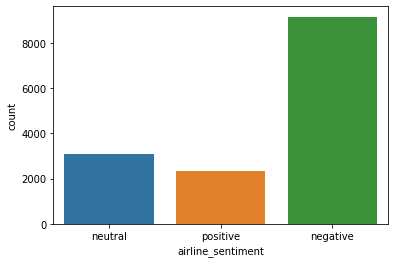

In [ ]:
#Plot the sentiment (positive, negative, neutral)
sns.countplot(data = data, x = 'airline_sentiment');

**Observations**

*   Approximately 62% all negative sentiment makes up dataset
*   Approximately 22% all neutral sentiment makes up dataset
*   Approximately 16% all positive sentiment makes up dataset



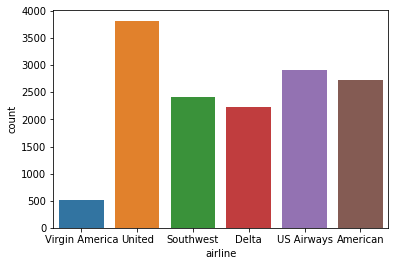

In [ ]:
#Plot the different airline
sns.countplot(data = data, x ='airline');

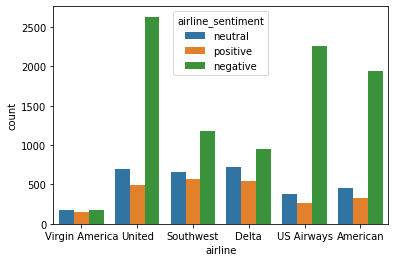

In [ ]:
#Plot the sentiment of each tweet broken down by airline
sns.countplot(data = data, x='airline', hue='airline_sentiment');

**Observations**

The three top airlines that have negative tweet sentiments are:

* United
* US Airways
* American

Southwest and Delta appear to have the most positive sentiments from their customers.

<hr>

Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

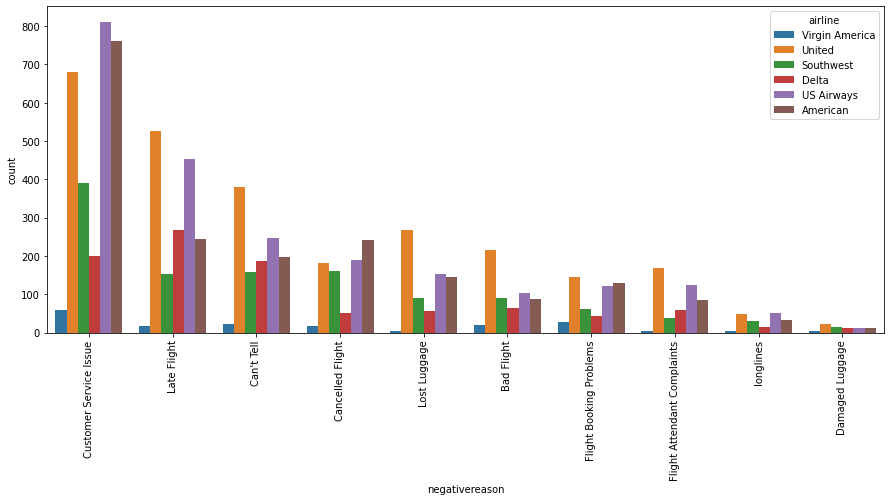

In [ ]:
#Plot distributions of negative tweets by reason
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='negativereason', hue='airline', order=data['negativereason'].value_counts().index)
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);

**Observations**

The majority of negative sentiments is customer service issues. United, US Airways and American airlines have the most negative sentiment directed at them.

<hr>


**Sentiment Word Cloud**

Plot the word cloud graph of tweets for positive and negative sentiment separately. To create the wordclouds, we will need to seperate the negative, positive, and neutral sentiments into separate lists.

In [ ]:
#Create a list of all the positive sentiments
positive_sentiment = data[data['airline_sentiment']=='positive']

In [ ]:
#Check the positive sentiment
positive_sentiment.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12124,570274148364242947,positive,1.0,NaN,NaN,American,NaN,treeguy81,NaN,0,@AmericanAir thanks!,NaN,2015-02-24 09:28:46 -0800,Raleigh NC,Quito
6970,569978537953902592,positive,1.0,NaN,NaN,Delta,NaN,sixfortheroad,NaN,0,@JetBlue We had 2 great flights into and out o...,NaN,2015-02-23 13:54:07 -0800,NaN,Atlantic Time (Canada)
14347,569623364337168384,positive,1.0,NaN,NaN,American,NaN,MikeCunningham,NaN,0,@AmericanAir Always enjoy my time. Now on the ...,NaN,2015-02-22 14:22:47 -0800,"Champaign/Urbana, IL",NaN
8598,568128390487789568,positive,1.0,NaN,NaN,Delta,NaN,GnarlsGnarley,NaN,0,@JetBlue thanks. Line moved quick. Already done.,NaN,2015-02-18 11:22:18 -0800,The Suite Lounge,Eastern Time (US & Canada)
4297,567729696662511616,positive,1.0,NaN,NaN,United,NaN,mchooyah,NaN,0,@united Thank you for the new Club at O'Hare. ...,NaN,2015-02-17 08:58:02 -0800,NaN,Mazatlan


In [ ]:
#Create a list of all the negative sentiments
negative_sentiment = data[data['airline_sentiment']=='negative']

In [ ]:
#Check the negative sentiment
negative_sentiment.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11231,568387549867036672,negative,1.000,Customer Service Issue,0.3499,US Airways,NaN,TomFutureforall,NaN,0,@USAirways just called reservations. Cannot c...,NaN,2015-02-19 04:32:06 -0800,NaN,NaN
9473,569917765676601344,negative,1.000,Customer Service Issue,0.6809,US Airways,NaN,jonbrownmusic,NaN,0,@USAirways Who intentionally buys a flight wit...,NaN,2015-02-23 09:52:38 -0800,New Orleans,NaN
4438,570256052966395906,negative,1.000,Customer Service Issue,1.0000,Southwest,NaN,user47,NaN,0,"@SouthwestAir Hey, friends. When I phone the A...",NaN,2015-02-24 08:16:52 -0800,"Lee's Summit, MO, @CityOfLS",Central Time (US & Canada)
10050,569557167411478528,negative,1.000,Lost Luggage,1.0000,US Airways,NaN,AuroraBIZ,NaN,0,@USAirways pretty upset I drove from Philly to...,NaN,2015-02-22 09:59:45 -0800,"Boston, MA",Eastern Time (US & Canada)
9771,569672234949742592,negative,0.667,Flight Attendant Complaints,0.3485,US Airways,NaN,weezerandburnie,NaN,0,@USAirways Really a letter that says you will ...,NaN,2015-02-22 17:36:59 -0800,Belle MO,NaN


In [ ]:
#Create a list of all the neutral sentiments
neutral_sentiment = data[data['airline_sentiment']=='neutral']

In [ ]:
#Check the neutral sentiment
neutral_sentiment.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3900,568034650477580289,neutral,1.0000,NaN,NaN,United,NaN,CombatBarbie318,NaN,0,@united leisure. Military personnel for safety...,NaN,2015-02-18 05:09:48 -0800,Wherever the Army sends me,Central Time (US & Canada)
438,568061922265804802,neutral,1.0000,NaN,NaN,Virgin America,NaN,sanjosedr,NaN,0,@VirginAmerica I miss the #nerdbird in San Jose,NaN,2015-02-18 06:58:11 -0800,"San Jose, California\n",Arizona
631,570236221575704576,neutral,0.6349,NaN,0.0,United,NaN,Evan_Flay,NaN,0,"@united I guess that's too much ask, huh?","[29.98386923, -95.33729612]",2015-02-24 06:58:04 -0800,Seattle,Pacific Time (US & Canada)
6958,569989575793180672,neutral,0.6616,NaN,0.0,Delta,NaN,mikeEfresh_,NaN,1,😳 LOLOLOLOLOL “@JetBlue: Our fleet's on fleek....,NaN,2015-02-23 14:37:59 -0800,New York,Quito
90,569915941192015872,neutral,1.0000,NaN,NaN,Virgin America,NaN,RamotControl,NaN,0,"@VirginAmerica ""You down with RNP?"" ""Yeah you ...",NaN,2015-02-23 09:45:23 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Create function to return wordcloud of both positive and negative sentiment
def sentiment_wordcloud(positive_sentiment, title):
    text = ' '.join(positive_sentiment['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    plot_wordcloud = wordcloud.WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
    plt.figure(figsize=(14,11))
    plt.imshow(plot_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

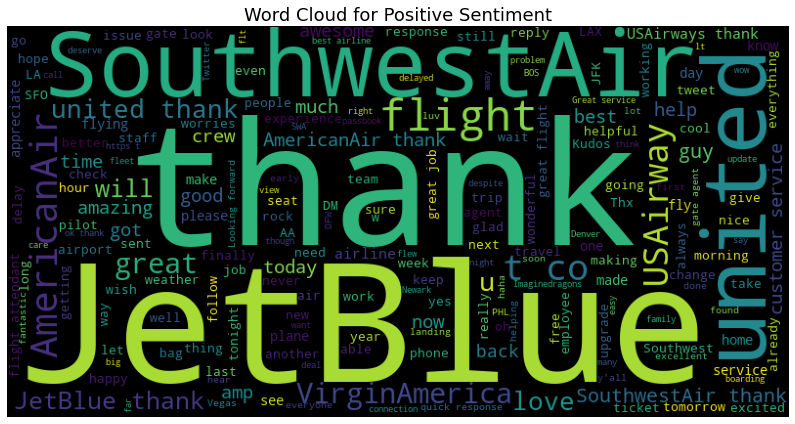

In [ ]:
#Positive sentiment wordcloud
sentiment_wordcloud(positive_sentiment,'Word Cloud for Positive Sentiment')

**Observations**

JetBlue appears to be the most common word in postive sentiment tweets, followed by Southwest and the word thanks.

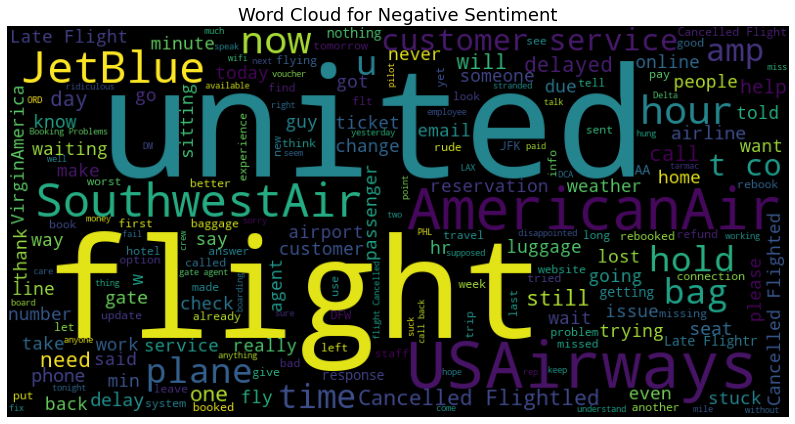

In [ ]:
#Negative sentiment word cloud
sentiment_wordcloud(negative_sentiment,'Word Cloud for Negative Sentiment')

**Observations**

United and flight are the most predominant negative sentiment words identified in the dataset.

<hr>

**Understanding of Data Columns**

Drop all other columns except “text” and “airline_sentiment”. Check the shape of the data. Print the first 5 rows of data.

In [ ]:
#New dataframe for columns text & airline_sentiment
sentiment_data = pd.DataFrame(columns = ['airline_sentiment','text'])

#Enter the desired orginal data into new dataframe
sentiment_data['airline_sentiment'], sentiment_data['text'] = data['airline_sentiment'], data['text']

In [ ]:
#Check the shape of the new dataframe
sentiment_data.shape
#Number of rows and columns
print(f'Number of rows: {sentiment_data.shape[0]} and Number of columns: {sentiment_data.shape[1]}')

Number of rows: 14604 and Number of columns: 2


In [ ]:
#Return first (5) rows in new dataframe
sentiment_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
#Check for any null values in new dataframe
sentiment_data.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

The is no null data in the new dataframe.

In [ ]:
#Check for any duplicated values in the new dataframe
sentiment_data.duplicated().sum()

152

There are 152 duplicate entries in the new dataframe. Since this makes up a very little representation of the entire dataset, we will drop these rows.

In [ ]:
#Dropping the duplicated values
sentiment_data.drop_duplicates(inplace = True)
sentiment_data.reset_index(inplace = True, drop ='first')

In [ ]:
#Validate duplicated values in the new dataframe have been dropped
sentiment_data.duplicated().sum()

0

In [ ]:
#Check the shape of the new dataframe after dropping duplicates
sentiment_data.shape
#Number of rows and columns
print(f'Number of rows: {sentiment_data.shape[0]} and Number of columns: {sentiment_data.shape[1]}')

Number of rows: 14452 and Number of columns: 2


In [ ]:
#Return first (5) rows in new dataframe after dropping duplicates
sentiment_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


##**Data Pre - Processing**

*   Html tag removal
*   Tokenization
*   Remove the numbers
*   Removal of Special Characters and Punctuations
*   Removal of stopwords
*   Conversion to lowercase
*   Lemmatize or stemming
*   Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
*   Print the first 5 rows of data after pre-processing.

In [ ]:
#Loop to apply the get_text method in order to remove HTML tags
for tag in np.arange(0, len(sentiment_data['text'])):
    sentiment_data['text'][tag] =  BeautifulSoup(sentiment_data['text'][tag]).get_text()

In [ ]:
#Display (5) random rows
sentiment_data.sample(5)

,airline_sentiment,text
195,negative,@VirginAmerica Because we never rec'd Cancelle...
2898,negative,@united You just tried to charge $750 for a $5...
12504,negative,@AmericanAir airport and 2 extra nights for ho...
4408,neutral,@SouthwestAir live in Atlanta but cant enroll ...
4099,neutral,@united Does the economy plus cabin also quali...


In [ ]:
#After reviewing the sample data, we found one that contained a URL in the tweet.
sentiment_data['text'][11251]

'@USAirways this is more than having patience. This is not acceptable. http://t.co/N7pSuEJDC8'

In [ ]:
#Loop to remove and links in the tweets
for link in np.arange(0, len(sentiment_data['text'])):
    sentiment_data['text'][link] =  re.sub(r"http\S+", "", sentiment_data['text'][link])

In [ ]:
#Verify link has been removed
sentiment_data['text'][11251]

'@USAirways this is more than having patience. This is not acceptable. '

In [ ]:
#Loop over the text column in the new dataset to remove any special characters, punctuation, numbers
for x in np.arange(0, len(sentiment_data['text'])):
    sentiment_data['text'][x] =  re.sub("[^a-zA-Z]", " ", sentiment_data['text'][x])

In [ ]:
#Verify special characters, punctuation, numbers have been removed
sentiment_data['text'][11251]

' USAirways this is more than having patience  This is not acceptable  '

In [ ]:
#Loop over the text column in the new dataset to covert text into lowercases
for letters in np.arange(0, len(sentiment_data['text'])):
    sentiment_data['text'][letters] = (sentiment_data['text'][letters]).lower()

In [ ]:
#Verify the text has been coverted into lowercases
sentiment_data['text'][11251]

' usairways this is more than having patience  this is not acceptable  '

In [ ]:
#Loop over the text and fix any and all contractions
for contraction in np.arange(0, len(sentiment_data['text'])):
    sentiment_data['text'][contraction] = contractions.fix(sentiment_data['text'][contraction])

In [ ]:
#Loop over the text and tokenize the text
nltk.download('punkt')
for words in np.arange(0, len(sentiment_data['text'])):
    sentiment_data['text'][words] = nltk.word_tokenize(sentiment_data['text'][words])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Display (5) random rows
sentiment_data.sample(5)

,airline_sentiment,text
951,negative,"[united, lovely, new, plane, from, lga, to, or..."
9018,neutral,"[usairways, hi, on, my, dividend, miles, accou..."
9497,negative,"[usairways, but, my, bag, is, still, missing]"
4321,neutral,"[southwestair, can, you, follow, me, so, i, ca..."
8090,negative,"[jetblue, phone, agents, can, t, see, same, fl..."


In [ ]:
#Ensure the English stopwords are utilized
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

#Removing 'not' from stopword list as to avoid missing any negative sentiments
stop_words.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Loop over the text to remove stopwords
for sw in np.arange(0, len(sentiment_data['text'])):
    words = sentiment_data['text'][sw] 
    sentiment_data['text'][sw] = [word for word in words if not word in stop_words]
    sentiment_data['text'][sw] = ' '.join(sentiment_data['text'][sw])

In [ ]:
#Display (5) random rows
sentiment_data.sample(5)

,airline_sentiment,text
5583,negative,southwestair guys cancelled flight bna flights...
13695,neutral,americanair yea worries going home denver not ...
12546,negative,americanair company policy refuses employees s...
9961,neutral,usairways livery back day
14159,negative,americanair worries called back hrs late fligh...


Since stemming can cause vital information loss, we will utizing lammatization as our method here.

In [ ]:
#Getting Spacy dependencies
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#Load en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Create function to lemmatize the text - Code taken from class
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crashed yesterday , our crash daily'

In [ ]:
#Loop over text to lammatize
for lam_text in np.arange(0, len(sentiment_data['text'])):
    sentiment_data['text'][lam_text] = lemmatize_text(sentiment_data['text'][lam_text])

In [ ]:
#Display (5) random rows
sentiment_data.sample(5)

,airline_sentiment,text
2931,positive,united big thank mn kn patiently clarify unite...
690,neutral,united flight dfw ord currently time see advis...
2244,negative,united flight delay another hour min transit l...
3247,negative,united make sure make cancel flighted flight b...
12321,negative,americanair thank acknowledgement ife work wel...


## **Vectorization**

* Use CountVectorizer
* Use TfidfVectorizer
* Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model

In [ ]:
#Copy of the sentinent_data dataset
sd_copy = sentiment_data.copy()

In [ ]:
#Identifying the maximum string length of the text within the dataset
list_of_text = sd_copy['text'].to_list()
len(max(list_of_text, key = len))

136

In [ ]:
#Create CountVectorizer with max features of 10,000
count_vectorizer = CountVectorizer(max_features=10000)
#Fit and transform the training data
features_cv = count_vectorizer.fit_transform(list_of_text)

In [ ]:
#Turn CV features into a NumPy array
features_cv = features_cv.toarray()

In [ ]:
#Examine the shape of the new array
features_cv.shape

(14452, 10000)

In [ ]:
#Create TFIDVectorizer with max features of 10,000
tfid_vectorizer = TfidfVectorizer(max_features=10000)
#Fit and transform the training data
features_tfid = tfid_vectorizer.fit_transform(list_of_text)

In [ ]:
#Turn TFID Vector features into a NumPy array
features_tfid = features_tfid.toarray()

In [ ]:
#Examine the shape of the new array 
features_tfid.shape

(14452, 10000)

## **Modeling, Cross-Validation, and Evaluation**

- Fit the model using vectorized column 
- Cross-validate the model performance 
- Evaluate the model using the confusion matrix 
- Target the final score >= 75% 
- Print the top 40 features and plot their word cloud using both types of vectorization.

Since these are classification problems, we will test a few different models:

- Random Forrest
- XGBoost

<hr>

In [ ]:
#Setting X and Y
x_cv = features_cv
x_tf = features_tfid
y = sd_copy['airline_sentiment'] 

In [ ]:
#Coverting airline sentiment from object datatype to a category
y = y.astype('category')
#Setting: 0 as Negative, 1 as Neutral, 2 as Positive sentiments respectfully
y = y.cat.codes
#Validating encoding
pd.DataFrame(y.head())

,0
0,1
1,2
2,1
3,0
4,0


In [ ]:
#Split the data into test and train
x_train_cv, x_test_cv, y_train, y_test = train_test_split(x_cv, y, test_size = 0.3, shuffle = False)
x_train_tf, x_test_tf, y_train, y_test = train_test_split(x_tf, y, test_size = 0.3, shuffle = False)

In [ ]:
#Create a function to get accuracy and cross validation scores
def accuracy(model, x_train, y_train, x_test):
    y_predict = model.predict(x_test)
    print('CV Score :', np.mean(cross_val_score(model, x_train, y_train, cv=10)))
    print("Accuracy (Test) : ",accuracy_score(y_test,y_predict))
    print(classification_report(y_test , y_predict))    

In [ ]:
#Create a function to build confusion matrix
def confusion(model, x_train, y_train, x_test):
  y_predict = model.predict(x_test)
  conf_matrix = confusion_matrix(y_test, y_predict)
  cm = pd.DataFrame(conf_matrix, index = [i for i in ['negative', 'neutral','positive']],
      columns = [i for i in ['negative', 'neutral','positive']])
  plt.figure(figsize = (10,7))
  sns.heatmap(cm, annot = True, fmt='g')

<hr>

**Random Forest**

<hr>

***CountVectorizer***

In [ ]:
#Random forest classifier for count vectorizer
rf_cv = RandomForestClassifier(n_estimators = 100, n_jobs=4)
rf_cv = rf_cv.fit(x_train_cv, y_train)

CV Score : 0.7183647857754425
Accuracy (Test) :  0.8134225092250923
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3196
           1       0.65      0.33      0.44       652
           2       0.72      0.55      0.62       488

    accuracy                           0.81      4336
   macro avg       0.74      0.61      0.65      4336
weighted avg       0.80      0.81      0.79      4336



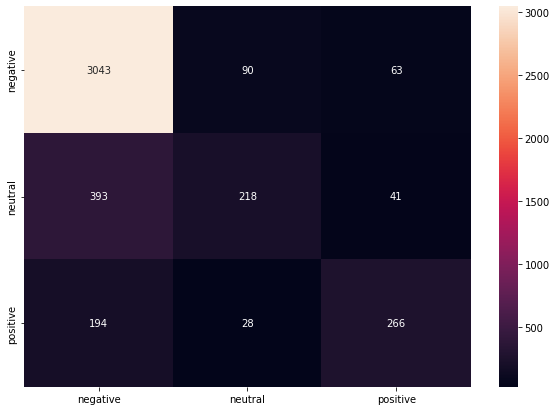

In [ ]:
#Show accuracy score
accuracy(rf_cv, x_train_cv, y_train, x_test_cv)

**Observations**

This model could be consider *slightly* underfit but has pretty decent scores with a CV score of approximately 72% and an accuracy score of 81%. Since we already identified that this dataset is inbalanced towards negative sentiment explains why we see the highest true positive rate in the confusion matrix for the negative sentiment.

In [ ]:
#Random forest classifier for TFID Vectorizer
rf_tfid = rf_tfid.fit(x_train_tf, y_train)

Cross_Validation accuracy : 0.7170320927586008
Accuracy (Test) :  0.7993357320786051
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2618
           1       0.65      0.27      0.38       565
           2       0.74      0.50      0.60       430

    accuracy                           0.80      3613
   macro avg       0.73      0.58      0.62      3613
weighted avg       0.78      0.80      0.77      3613



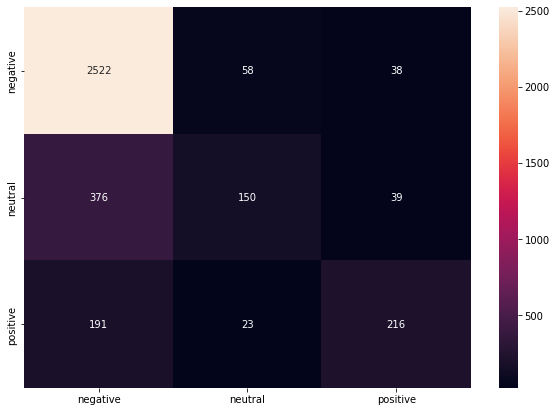

In [ ]:
#Show accuracy score and plot the confusion matrix
accuracy(rf_tfid, x_train_tf, y_train, x_test_tf)

**Observations**

While this is still a decennt performing model, the accuracy here dropped a little to 79% as compared to the count vectorizer.
<hr>


Print the top 40 features and plot their word cloud using both types of vectorization.

thank,united,not,delay,hour,great,jetblue,flight,usairway,love,southwestair,bag,cancel,awesome,hold,customer,good,get,virginamerica,bad,amazing,fleek,wait,time,help,please,dm,fly,plane,service,make,follow,call,still,lose,airline,need,go,much,well,
 
 


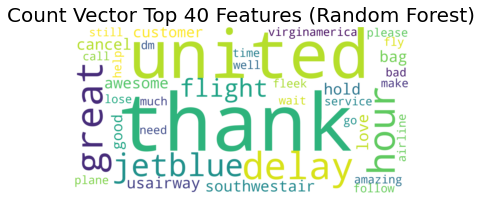

In [ ]:
#WordCloud for Random Forest Count Vectorizer
cv_features = count_vectorizer.get_feature_names()              
top_40_features = ''                                           
feat = rf_cv.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_40_features += cv_features[i]
    top_40_features += ','
print(top_40_features)  
print(" ") 
print(" ")     
wordcloud = WordCloud(background_color = "white", width=3000, height=1500).generate(top_40_features)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.figure(1, figsize = (14, 11), frameon = 'equal')
plt.title('Count Vector Top 40 Features (Random Forest)', fontsize=20)
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


thank,united,jetblue,southwestair,not,flight,delay,great,hour,usairway,love,virginamerica,good,bag,get,hold,awesome,cancel,customer,dm,time,bad,service,please,amazing,fleek,fly,make,follow,wait,help,fleet,plane,much,send,still,call,well,need,go,
 
 


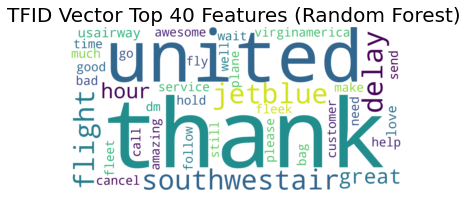

In [ ]:
#WordCloud for Random Forest TFID Vectorizer
tfid_features = tfid_vectorizer.get_feature_names()              
top_40_features = ''                                           
feat = rf_cv.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_40_features += tfid_features[i]
    top_40_features += ','
print(top_40_features)  
print(" ") 
print(" ")     
wordcloud = WordCloud(background_color = "white", width=3000, height=1500).generate(top_40_features)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.figure(1, figsize = (14, 11), frameon = 'equal')
plt.title('TFID Vector Top 40 Features (Random Forest)', fontsize=20)
plt.axis("off")
plt.show()

## **Summary**

We reviewed multiple airlines to determine if a model could be built to determine the sentiment of customer tweets. We found that United airline was the airline most represented in the dataset - which the negative sentiment identified for customer service and late flights. The airline with the most positive sentiment was Southwest and Delta.

We also identified that approximately 63% of the dataset contained negative sentiments which created a slightly imbalances dataset.

We built (2) random forest classification models - using two diffent vectorization techniques. The best model reported a over 81% accuracy and a 72% cross validation score. This is a strong model. It is recommended to test using multiple classification models using decision trees, boosting, logistic regression, etc. We attempted to run these but it was too computationally intensive and would not exwecute locally.

<hr>

## **Business Recommendations**

It is reasonable to expect that late flights would have more angry customers who are most likley to call customer service and have a negative experience, given the circustances. Airlines could potentially benfit from re-evaluating how customer service processes could be improved for these types of events. That is not to suggest a potential coorelation is responsible for causation, but given these are two major painpoints for flyers, it could help defuse a negative situatuion.

Additionally, it would be benficial to collect more data from under represented airlines such aas Virgin Air and Delta airline. 